In [ ]:
# =============================
# Import Required Libraries
# =============================
import requests   # For making API requests
import pandas as pd   # For handling data in tabular format
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns   # For advanced visualizations

# =============================
# Step 1: API Configuration
# =============================

# Replace this with your own API key (Sign up free at https://openweathermap.org/api)
API_KEY = "f9f5b60b83f7c53d84292c35973e7dcf"
CITY = "Chennai"  # You can change this to any city
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast"

In [ ]:
# =============================
# Step 2: Fetch Data from API
# =============================

# Prepare request parameters
params = {
    "q": CITY,
    "appid": API_KEY,
    "units": "metric"   # Use Celsius instead of Kelvin
}

# Make GET request to API
response = requests.get(BASE_URL, params=params)

# Check if request is successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")
else:
    print("Error fetching data:", response.status_code)
    exit()

Data fetched successfully!


In [ ]:
# =============================
# Step 3: Process JSON Data
# =============================

# The API returns 5-day forecast data in 3-hour intervals
forecast_list = data['list']

# Extract relevant information
weather_data = []
for forecast in forecast_list:
    weather_data.append({
        "datetime": forecast['dt_txt'],
        "temperature": forecast['main']['temp'],
        "feels_like": forecast['main']['feels_like'],
        "humidity": forecast['main']['humidity'],
        "weather": forecast['weather'][0]['description'],
        "wind_speed": forecast['wind']['speed']
    })

# Convert to pandas DataFrame
df = pd.DataFrame(weather_data)

# Convert datetime column to proper datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Display first few rows
print(df.head())


             datetime  temperature  feels_like  humidity           weather  \
0 2025-09-25 09:00:00        33.40       39.81        58  scattered clouds   
1 2025-09-25 12:00:00        31.31       37.51        67     broken clouds   
2 2025-09-25 15:00:00        30.54       35.08        65        light rain   
3 2025-09-25 18:00:00        29.95       33.99        66     broken clouds   
4 2025-09-25 21:00:00        28.96       31.93        66     broken clouds   

   wind_speed  
0        2.21  
1        7.14  
2        5.18  
3        2.03  
4        1.78  


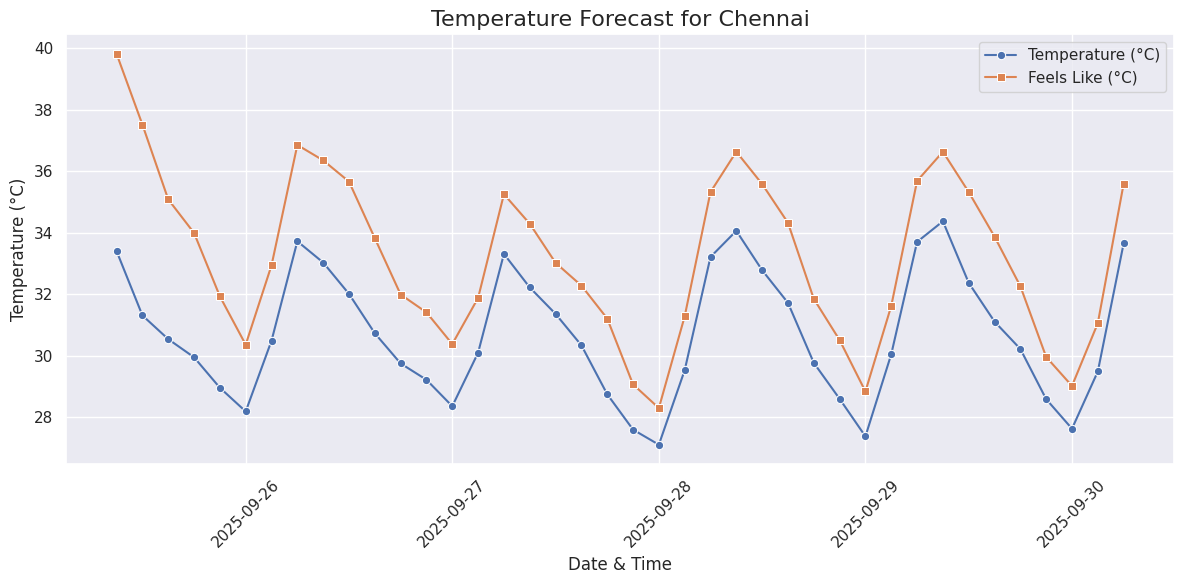

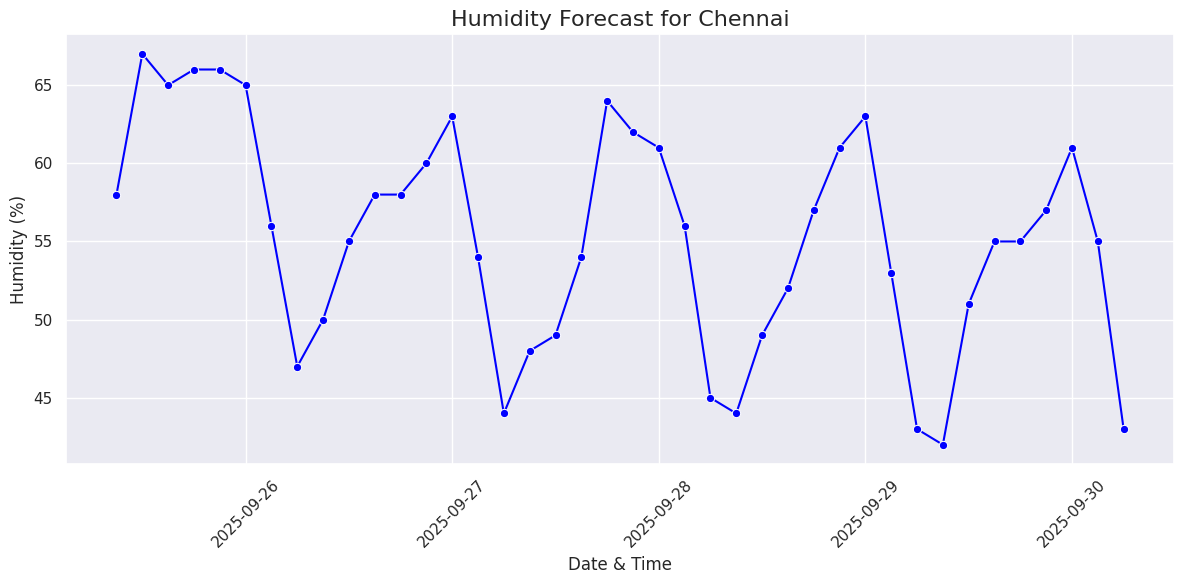

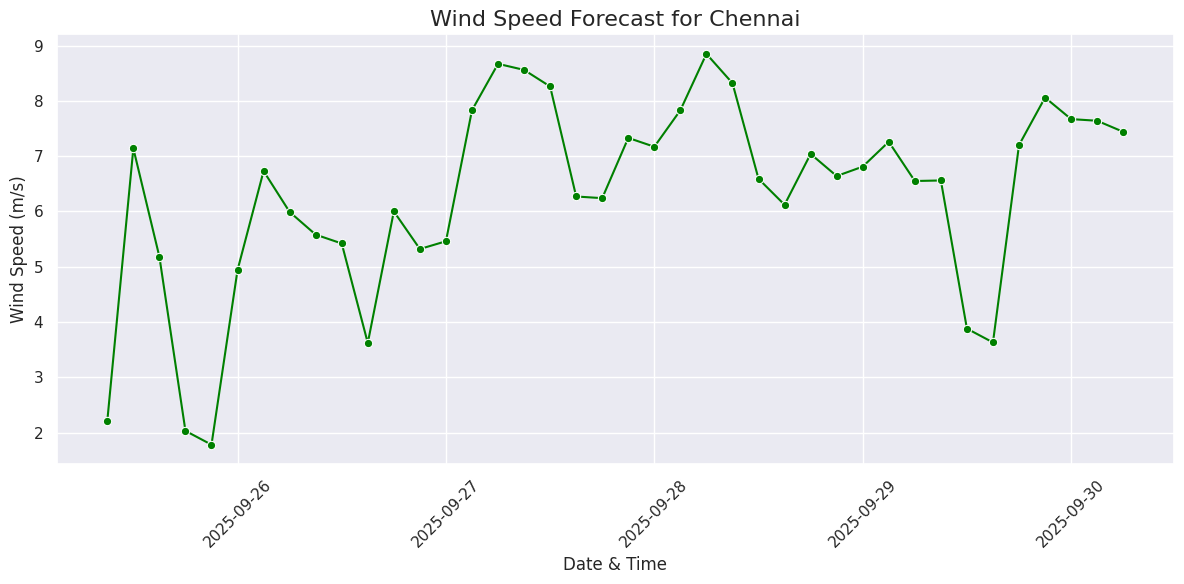

/tmp/ipython-input-1214810748.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="weather", data=df, order=df['weather'].value_counts().index, palette="viridis")


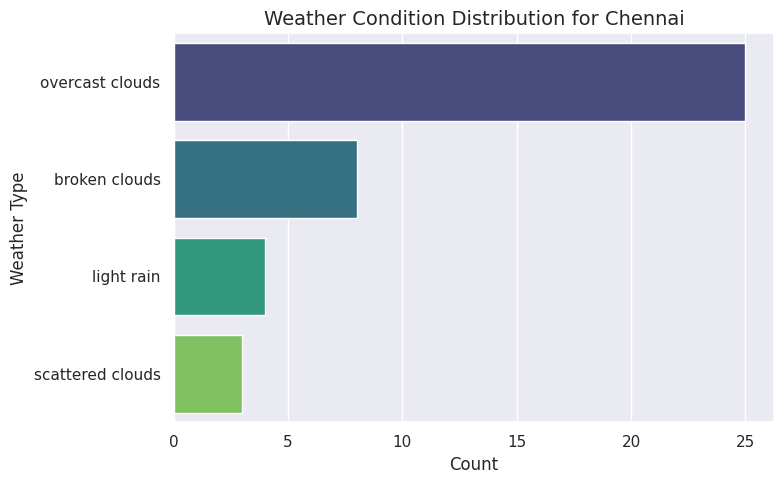

In [ ]:
# =============================
# Step 4: Data Visualization
# =============================

# Set style for seaborn plots
sns.set(style="darkgrid")

# 1) Line plot for Temperature over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="datetime", y="temperature", data=df, marker="o", label="Temperature (°C)")
sns.lineplot(x="datetime", y="feels_like", data=df, marker="s", label="Feels Like (°C)")
plt.title(f"Temperature Forecast for {CITY}", fontsize=16)
plt.xlabel("Date & Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Humidity trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="datetime", y="humidity", data=df, color="blue", marker="o")
plt.title(f"Humidity Forecast for {CITY}", fontsize=16)
plt.xlabel("Date & Time")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Wind Speed trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="datetime", y="wind_speed", data=df, color="green", marker="o")
plt.title(f"Wind Speed Forecast for {CITY}", fontsize=16)
plt.xlabel("Date & Time")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) Countplot for Weather Conditions
plt.figure(figsize=(8, 5))
sns.countplot(y="weather", data=df, order=df['weather'].value_counts().index, palette="viridis")
plt.title(f"Weather Condition Distribution for {CITY}", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Weather Type")
plt.tight_layout()
plt.show()


In [ ]:
# =============================
# Step 5: Dashboard Summary
# =============================
print("\nDashboard Summary:")
print(f"City: {CITY}")
print(f"Temperature Range: {df['temperature'].min()}°C to {df['temperature'].max()}°C")
print(f"Average Humidity: {df['humidity'].mean():.2f}%")
print(f"Common Weather Condition: {df['weather'].mode()[0]}")



Dashboard Summary:
City: Chennai
Temperature Range: 27.11°C to 34.37°C
Average Humidity: 55.30%
Common Weather Condition: overcast clouds
